# Experimental design 

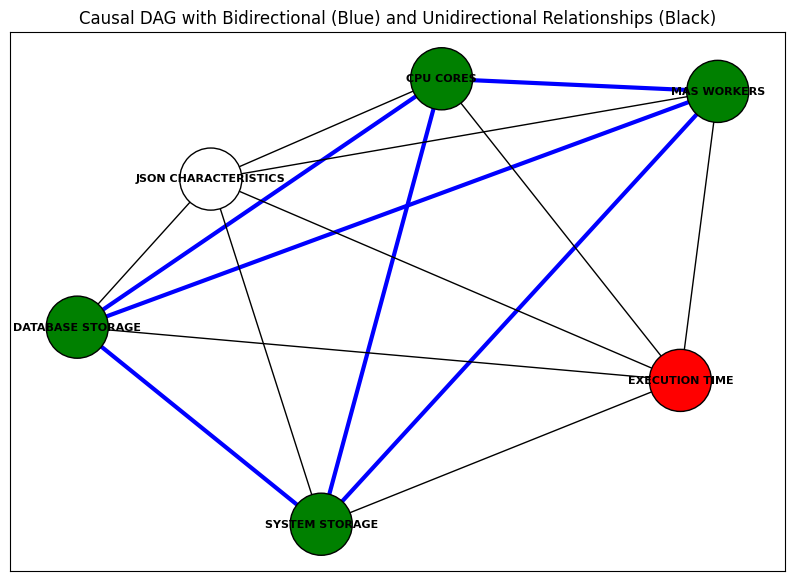

In [19]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a Directed Graph
G = nx.DiGraph()

# Define bidirectional relationships (single thick blue arrows with two heads)
edges_bidirectional = [
    ('CPU CORES', 'SYSTEM STORAGE'),
    ('CPU CORES', 'DATABASE STORAGE'),
    ('MAS WORKERS', 'DATABASE STORAGE'),
    ('MAS WORKERS', 'SYSTEM STORAGE'),
    ('DATABASE STORAGE', 'SYSTEM STORAGE'),
    ('MAS WORKERS', 'CPU CORES')
]

# Define unidirectional relationships (single thin black arrows)
edges_unidirectional = [
    ('CPU CORES', 'EXECUTION TIME'),
    ('SYSTEM STORAGE', 'EXECUTION TIME'),
    ('DATABASE STORAGE', 'EXECUTION TIME'),
    ('MAS WORKERS', 'EXECUTION TIME'),
    ('JSON CHARACTERISTICS', 'EXECUTION TIME'),
    ('JSON CHARACTERISTICS', 'MAS WORKERS'),
    ('JSON CHARACTERISTICS', 'SYSTEM STORAGE'),
    ('JSON CHARACTERISTICS', 'CPU CORES'),
    ('JSON CHARACTERISTICS', 'DATABASE STORAGE')
]

# Add unidirectional edges to the graph
G.add_edges_from(edges_unidirectional)

# Generate a position layout
pos = nx.spring_layout(G, seed=42)

# Assign colors: Red for 'Execution Time', White for 'JSON CHARACTERISTICS', Green for others
node_colors = {
    "EXECUTION TIME": "red",
    "JSON CHARACTERISTICS": "white"
}
default_color = "green"
node_color_list = [node_colors.get(node, default_color) for node in G.nodes()]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 7))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_color_list, edgecolors="black", node_size=2000, ax=ax)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold", ax=ax)

# Draw bidirectional edges as a single thick blue line with two arrowheads
for a, b in edges_bidirectional:
    nx.draw_networkx_edges(G, pos, edgelist=[(a, b)], edge_color="blue", width=3, ax=ax, arrows=True, arrowstyle='<->')

# Draw unidirectional edges as thin black arrows
nx.draw_networkx_edges(G, pos, edgelist=edges_unidirectional, edge_color="black", width=1, ax=ax, arrows=True)

# Set title
plt.title("Causal DAG with Bidirectional (Blue) and Unidirectional Relationships (Black)", fontsize=12)

# Save the figure before calling plt.show()
plt.savefig("Causal Dag.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()
